# Exercise 1. Dynamical Systems Theory in Machine Learning & Data Science
# Name:- Kaushal Kumar 

# 1. Poincare-Bendixson Theorem

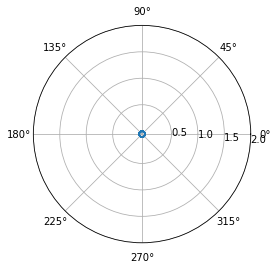

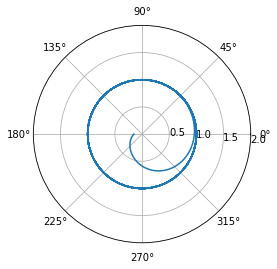

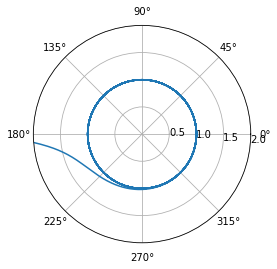

In [1]:
import numpy as np
import matplotlib.pyplot as plt
dt=0.01
t=np.arange(0,100,dt)
n=len(t)

def f(r):
    return r*(1-r**2)

def g(theta):
    return 1

r=np.zeros(n)
theta=np.zeros(n)

ini=[0.00,0.15,3]
for k in range(len(ini)):
    r[0]=ini[k]

    theta[0]=np.pi

    for i in range(n-1):
        r[i+1]=r[i]+f(r[i])*dt
        theta[i+1]=theta[i]+g(theta[i])*dt
        

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, r)
    ax.set_rmax(2)
    ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
    ax.set_rlabel_position(-5.5)  # Move radial labels away from plotted line
    ax.grid(True)
    
                 
plt.show()

In the above plot, the top most plot is for initial condition at r=0. This is the unstalbe fixed point. 

The Middle and the bottom plot, all the trajectories spiral asymptotically towards limit cycle at r=1. Here initial condition are 0.15 and 3 respectively.

# 3. FitzHugh-Nagumo Model

Details of analytic solution is attached with this jupyter as pdf.

for a=0, b=0.05.

The v-nullclines is$ w= v-v^{3}/3 +I$

The w- nullclines is $ w= 2v$

In [2]:
from functools import partial
import numpy as np
import scipy.integrate
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
%matplotlib inline

# simulate some trajectories. 
# small perturbation of the resting potential as inital conditions. 

scenarios = [
     {"a":0.0, "b":0.5, "tau":10, "I":0},
     {"a":-.3, "b":1.4, "tau":10, "I":0.23},
     {"a":0.05, "b":0.7, "tau":10, "I":0.5}
]
time_span = np.linspace(0, 200, num=1000)

def fitzhugh_nagumo(x, t, a, b, tau, I):
    return np.array([x[0] -x[0]**3/3 - x[1] + I, 
                     (x[0] - a - b * x[1])/tau])

def get_displacement(param, dmax=0.5,time_span=np.linspace(0,200, 1000), number=20):
    ic = scipy.integrate.odeint(partial(fitzhugh_nagumo, **param),
                                                      y0=[0.6,0.4],
                                                      t= np.linspace(0,999, 1000))[-1]
    # displacement of the potential. 
    traj = [] 
    for displacement in np.linspace(0,dmax, number):
        traj.append(scipy.integrate.odeint(partial(fitzhugh_nagumo, **param),
                                                      y0=ic+np.array([displacement,0]),
                                                      t=time_span))
    return traj

# Trajectories at different values of I, a, b, tau

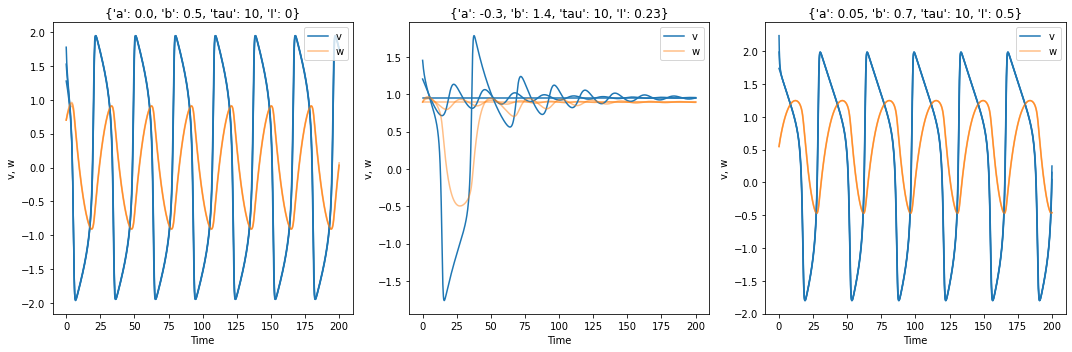

In [3]:
# Do the numerical integration.
trajectories = {} # We store the trajectories in a dictionnary
for i,param in enumerate(scenarios):
    trajectories[i] = get_displacement(param, number=3, time_span=time_span, dmax=0.5)
    
# Draw the trajectories. 
fig, ax = plt.subplots(1, len(scenarios), figsize=(5*len(scenarios),5))
for i,param in enumerate(scenarios):
        ax[i].set(xlabel='Time', ylabel='v, w',
                     title='{}'.format(param))
        for j in range(len(trajectories[i])):
            v = ax[i].plot(time_span,trajectories[i][j][:,0], color='C0')
            w = ax[i].plot(time_span,trajectories[i][j][:,1], color='C1', alpha=.5)
        ax[i].legend([v[0],w[0]],['v','w'])
plt.tight_layout()

# Nullclines

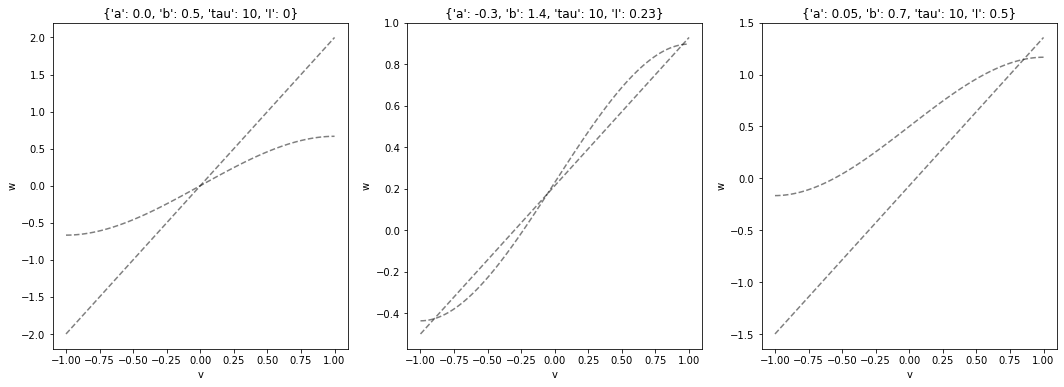

In [4]:
def plot_isocline(ax, a, b, tau, I, color='k', style='--', opacity=.5, vmin=-1,vmax=1):
    v = np.linspace(vmin,vmax,100)
    ax.plot(v, v - v**3/3 + I, style, color=color, alpha=opacity)
    ax.plot(v, (v - a)/b, style, color=color, alpha=opacity)
    
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for i, sc in enumerate(scenarios):
    plot_isocline(ax[i], **sc)
    ax[i].set(xlabel='v', ylabel='w',
              title='{}'.format(sc))

# Flow

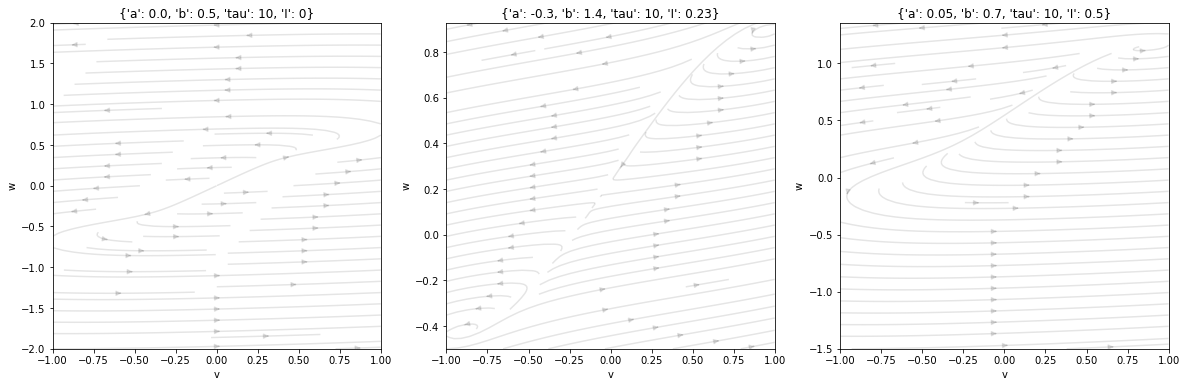

In [5]:
def plot_vector_field(ax, param, xrange, yrange, steps=50):
    # Compute the vector field
    x = np.linspace(xrange[0], xrange[1], steps)
    y = np.linspace(yrange[0], yrange[1], steps)
    X,Y = np.meshgrid(x,y)
    
    dx,dy = fitzhugh_nagumo([X,Y],0,**param)   
    ax.streamplot(X,Y,dx, dy, color=(0,0,0,.1))
    
    ax.set(xlim=(xrange[0], xrange[1]), ylim=(yrange[0], yrange[1]))
    
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for i, sc in enumerate(scenarios):
    xrange = (-1, 1)
    yrange = [(1/sc['b'])*(x-sc['a']) for x in xrange]
    plot_vector_field(ax[i], sc, xrange, yrange)
    ax[i].set(xlabel='v', ylabel='w',
          title='{}'.format(sc))

# Equilibrium points


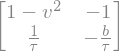

In [6]:
def find_roots(a,b,I, tau):
    # The coeficients of the polynomial equation are:
    # 1/3           * v**3 
    # 0           * v**2 
    # - (1/b - 1) * v**1 
    # - (a/b + I) * v**0
    coef = [1/3, 0, 1/b - 1, - a/b - I]
    
    # We are only interested in real roots.
    # np.isreal(x) returns True only if x is real. 
    # The following line filter the list returned by np.roots
    # and only keep the real values. 
    roots = [np.real(r) for r in np.roots(coef) if np.isreal(r)]
    
    # We store the position of the equilibrium. 
    return [[r, r - r**3/3 + I] for r in roots]

eqnproot = {}
for i, param in enumerate(scenarios):
    eqnproot[i] = find_roots(**param)
    

# You can use the following color code:
EQUILIBRIUM_COLOR = {'Stable node':'C0',
                    'Unstable node':'C1', 
                    'Saddle':'C4',
                    'Stable focus':'C3',
                    'Unstable focus':'C2',
                    'Center':'C5'}

def jacobian_fitznagumo(v, w, a, b, tau, I):
    """ Jacobian matrix of the ODE system modeling Fitzhugh-Nagumo's excitable system
    Args
    ====
        v (float): Membrane potential
        w (float): Recovery variable
        a,b (float): Parameters
        tau (float): Recovery timescale.
    Return: np.array 2x2"""
    return np.array([[- v**2 + 1 , -1],
                       [1/tau, -b/tau]])

# Symbolic computation of the Jacobian using sympy... 
import sympy 
sympy.init_printing()

# Define variable as symbols for sympy
v, w = sympy.symbols("v, w")
a, b, tau, I = sympy.symbols("a, b, tau, I")

# Symbolic expression of the system
dvdt = v - v**3/3 - w + I
dwdt = (v - a - b * w)/tau

# Symbolic expression of the matrix
sys = sympy.Matrix([dvdt, dwdt])
var = sympy.Matrix([v, w])
jac = sys.jacobian(var)

#  can convert jac to a function:
jacobian_fitznagumo_symbolic = sympy.lambdify((v, w, a, b, tau, I), jac, dummify=False)

#jacobian_fitznagumo = jacobian_fitznagumo_symbolic
jac

In [7]:
def stability(jacobian):
    """ Stability of the equilibrium given its associated 2x2 jacobian matrix. 
    Use the eigenvalues. 
    Args:
        jacobian (np.array 2x2): the jacobian matrix at the equilibrium point.
    Return:
        (string) status of equilibrium point.
    """
    
    eigv = np.linalg.eigvals(jacobian)
    
    
    if all(np.real(eigv)==0) and all(np.imag(eigv)!=0):
        nature = "Center" 
    elif np.real(eigv)[0]*np.real(eigv)[1]<0:
        nature = "Saddle"
    else: 
        stability = 'Unstable' if all(np.real(eigv)>0) else 'Stable'
        nature = stability + (' focus' if all(np.imag(eigv)!=0) else ' node')
    return nature

def stability_alt(jacobian):
    """ Stability of the equilibrium given its associated 2x2 jacobian matrix. 
    Use the trace and determinant. 
    Args:
        jacobian (np.array 2x2): the jacobian matrix at the equilibrium point.
    Return:
        (string) status of equilibrium point.
    """
    
    determinant = np.linalg.det(jacobian)
    trace = np.matrix.trace(jacobian)
    if np.isclose(trace, 0):
        nature = "Center (Hopf)"
    elif np.isclose(determinant, 0):
        nature = "Transcritical (Saddle-Node)"
    elif determinant < 0:
        nature = "Saddle"
    else:
        nature = "Stable" if trace < 0 else "Unstable"
        nature += " focus" if (trace**2 - 4 * determinant) < 0 else " node"
    return nature

eqstability = {}
for i, param in enumerate(scenarios):
    eqstability[i] = []
    for e in eqnproot[i]:
        J = jacobian_fitznagumo(e[0],e[1], **param)
        eqstability[i].append(stability(J))    
eqstability

{0: ['Unstable node'],
 1: ['Stable focus', 'Unstable focus', 'Saddle'],
 2: ['Unstable focus']}

# Phase diagram

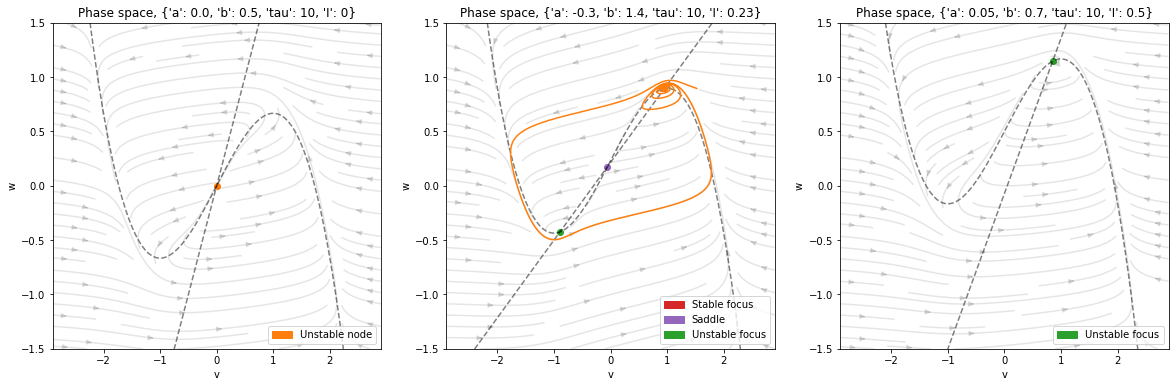

In [8]:
def plot_phase_diagram(param, ax=None, title=None):
    """Plot a complete Fitzhugh-Nagumo phase Diagram in ax.
    Including isoclines, flow vector field, equilibria and their stability"""
    if ax is None:
        ax = plt.gca()
    if title is None:
        title = "Phase space, {}".format(param) 
    
    ax.set(xlabel='v', ylabel='w', title=title)
        
    # Isocline and flow... 
    xlimit = (-2.9, 2.9)
    ylimit = (-1.5, 1.5)
    plot_vector_field(ax, param, xlimit, ylimit)
    plot_isocline(ax, **param, vmin=xlimit[0],vmax=xlimit[1])
    
    # Plot the equilibria 
    eqnproot = find_roots(**param)
    eqstability = [stability(jacobian_fitznagumo(e[0],e[1], **param)) for e in eqnproot] 
    for e,n in zip(eqnproot,eqstability):
        ax.scatter(*e, color=EQUILIBRIUM_COLOR[n])
        
        # Show a small perturbation of the stable equilibria...
        time_span = np.linspace(0, 200, num=1500)
        if n[:6] == 'Stable':
            for perturb in (0.1, 0.6):
                ic = [e[0]+abs(perturb*e[0]),e[1]]
                traj = scipy.integrate.odeint(partial(fitzhugh_nagumo, **param),
                                                  y0=ic,
                                                  t=time_span)
                ax.plot(traj[:,0], traj[:,1])

    # Legend
    labels = frozenset(eqstability)
    ax.legend([mpatches.Patch(color=EQUILIBRIUM_COLOR[n]) for n in labels], labels, 
           loc='lower right')
    
fig, ax = plt.subplots(1,3, figsize=(20, 6))
for i, param in enumerate(scenarios):
    plot_phase_diagram(param, ax[i])